Connected to PRL (Python 3.11.0)

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import pandas as pd
from tqdm import tqdm
import random
from utils import RuleEvaluation, DDQNEvaluation, Plotter
from agent import DDQNAgent, TemporalDDQNAgent
from TestEnv import Electric_Car
seed = 2705
TRAIN = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load Data

def elongate(df):
    df_long = pd.wide_to_long(df, i = "PRICES", j = "hour", stubnames=["Hour"], sep = " ").reset_index()
    df_long.rename(columns={"Hour": "price", "PRICES": "date"}, inplace = True)
    df_long['datetime'] = pd.to_datetime(df_long['date']) + pd.to_timedelta(df_long['hour'], unit='h')
    df_long.sort_values(['datetime'], ascending=[True], inplace=True)
    df_long['price'] = df_long['price'].astype(float) 
    return df_long.reset_index(drop=True)

train_name = 'data/train.xlsx'
val_name = 'data/validate.xlsx'
train = elongate(pd.read_excel(train_name))
val = elongate(pd.read_excel(val_name))
features_train = pd.read_csv('data/features_train.csv')
features_val = pd.read_csv('data/features_val.csv')
gamma = 0.9873110587278168
reward_shaping_factor = 0.25431850336132306
battery_factor = 0.03485932850517898

In [2]:
seed = 2705
rep = 420000
batch_size = 48
gamma = gamma
epsilon = 1.0
epsilon_decay = 99999
epsilon_min = 0.1
learning_rate = 5e-5
price_horizon = 48
future_horizon = 0
hidden_dim = 128
num_layers = 4
positions = False
action_classes = 3
reward_shaping = True
factor = reward_shaping_factor
verbose = False
normalize = True
df = train_name

In [3]:
## Evaluation ##
TRAIN = False

if TRAIN:
    df = train_name
    features = features_train
else:
    df = val_name
    features = features_val


# Initialize Environment
env = Electric_Car(path_to_test_data=df)

#Initialize DQN
agent = DDQNAgent(env = env,
                features = features,
                epsilon_decay = epsilon_decay,
                epsilon_start = epsilon,
                epsilon_end = epsilon_min,
                discount_rate = gamma,
                lr = learning_rate,
                buffer_size = 100000,
                price_horizon = price_horizon,
                hidden_dim=hidden_dim,
                num_layers = num_layers,
                positions = positions,
                action_classes = action_classes, 
                reward_shaping = reward_shaping,
                shaping_factor = factor,
                normalize = normalize,
                verbose = False)

agent.dqn_predict.load_state_dict(torch.load(f'models/random_search_gamma{gamma}_factor_{factor}.pt'))

# Evaluate Rule-Based Agent
eval_ddqn = DDQNEvaluation(price_horizon=price_horizon)
eval_ddqn.evaluate(agent = agent)

Absolute Balance:  -365.03449771604943


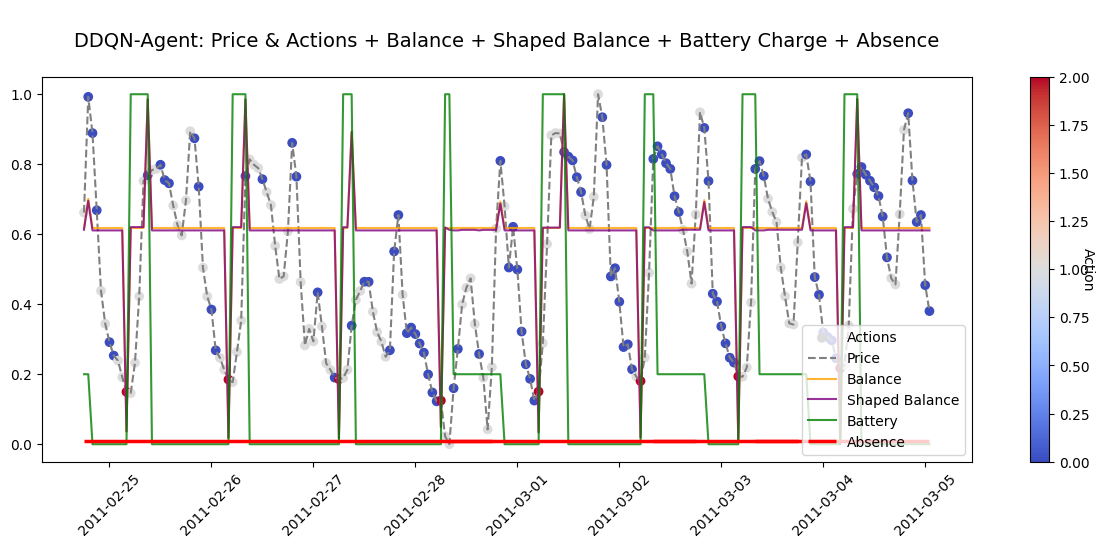

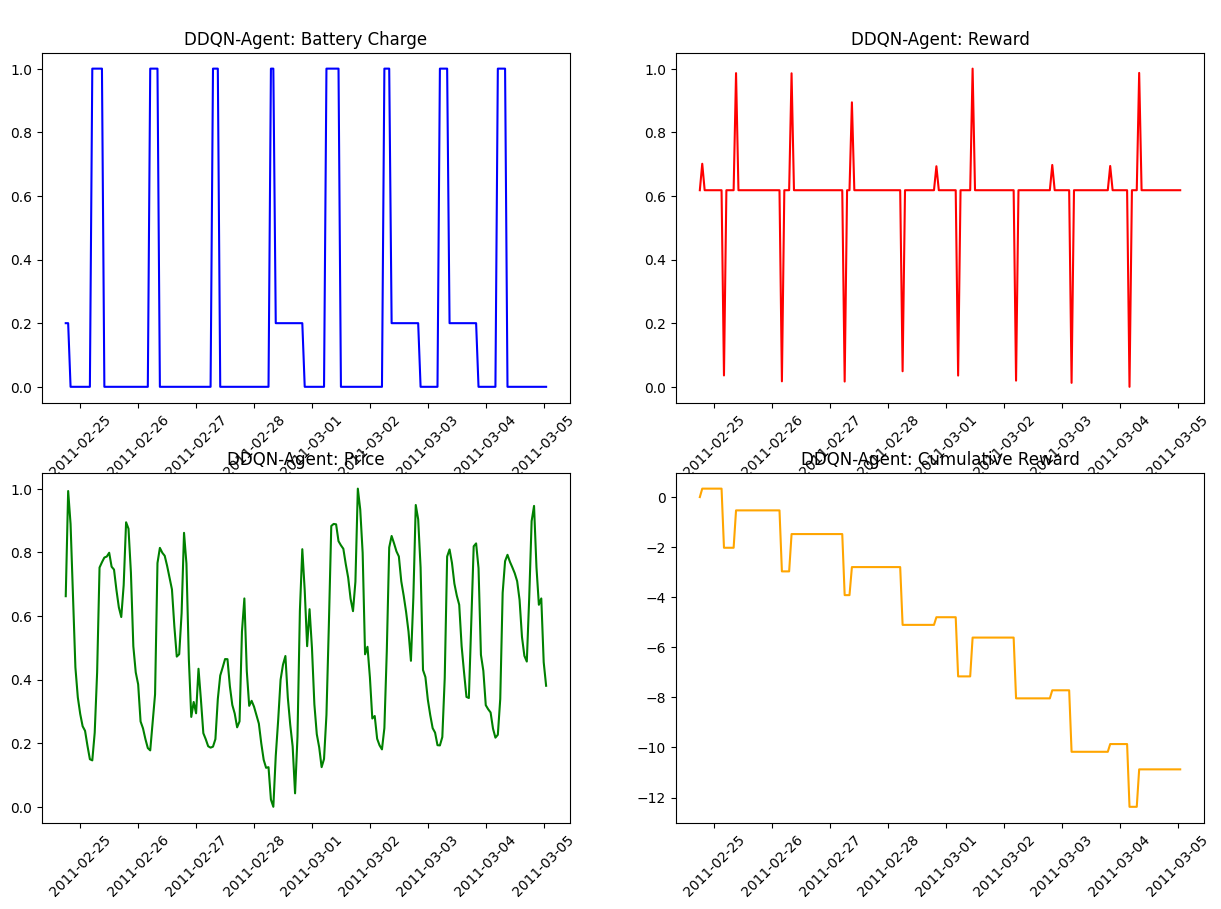

In [4]:
#Visualize DDQN Agent
#plot_range = [14000, 14300]
plot_range = [9000, 9200]
#plot_range = [0, 110000]

plotter = Plotter(eval_ddqn, range = plot_range)
#plotter.plot_actions(battery = False, balance=False, absence = False)
# plotter.plot_actions(battery = False, balance=False, absence = True)
# plotter.plot_actions(battery = False, balance=True, absence = True)
plotter.plot_actions(battery = True, balance=True, absence = True, shaped = True)

plotter.plot_single()

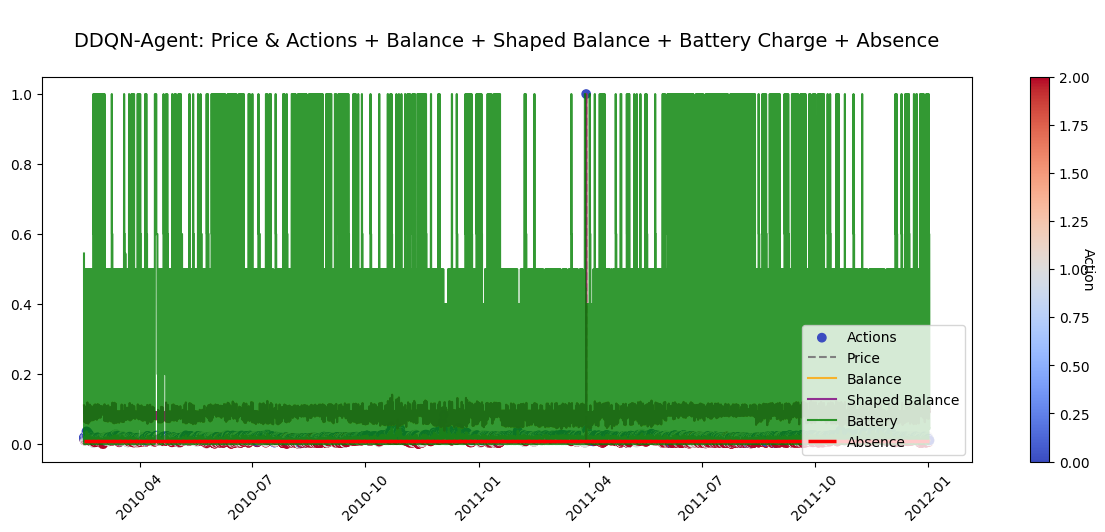

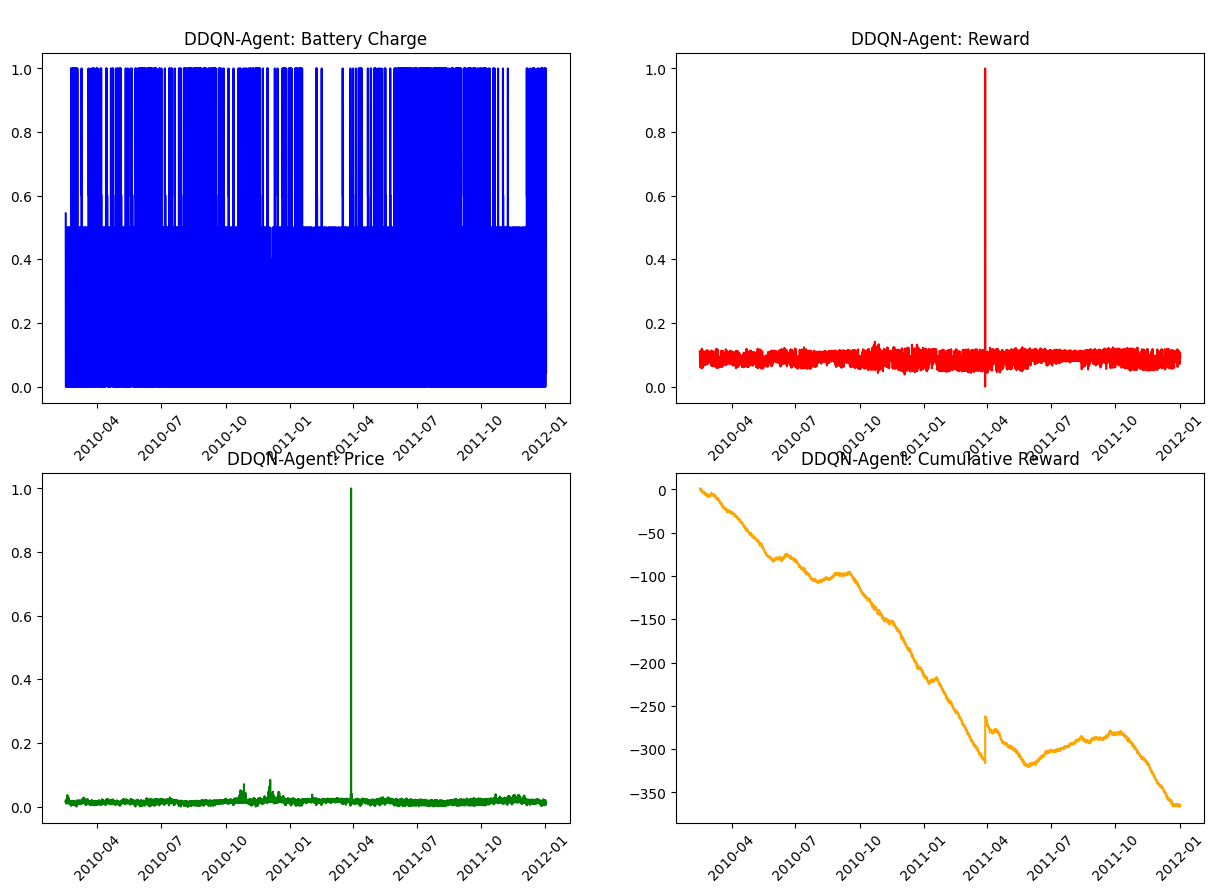

In [5]:
#Visualize DDQN Agent
#plot_range = [14000, 14300]
#plot_range = [9000, 9200]
plot_range = [0, 110000]

plotter = Plotter(eval_ddqn, range = plot_range)
#plotter.plot_actions(battery = False, balance=False, absence = False)
# plotter.plot_actions(battery = False, balance=False, absence = True)
# plotter.plot_actions(battery = False, balance=True, absence = True)
plotter.plot_actions(battery = True, balance=True, absence = True, shaped = True)

plotter.plot_single()

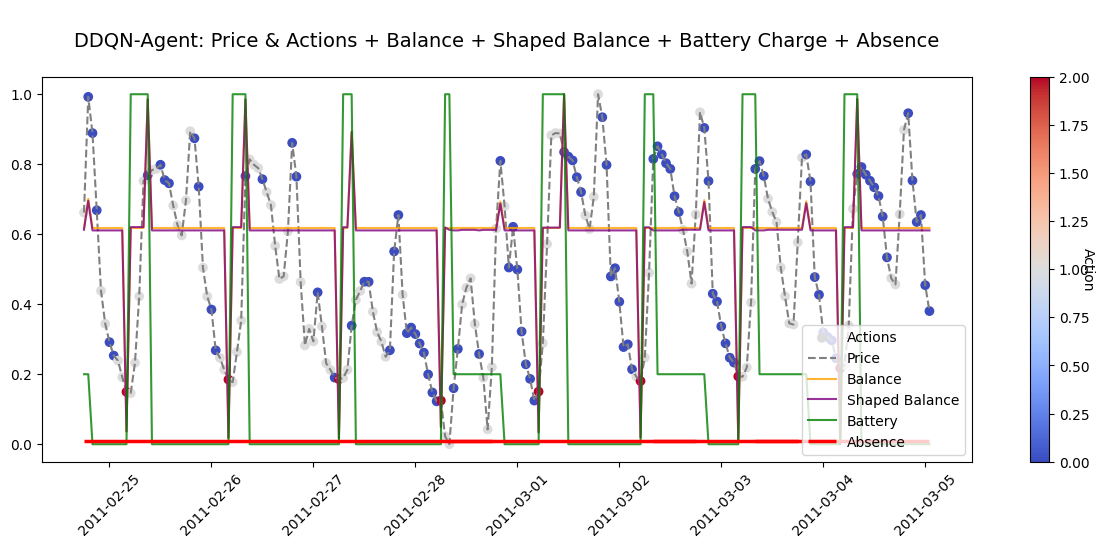

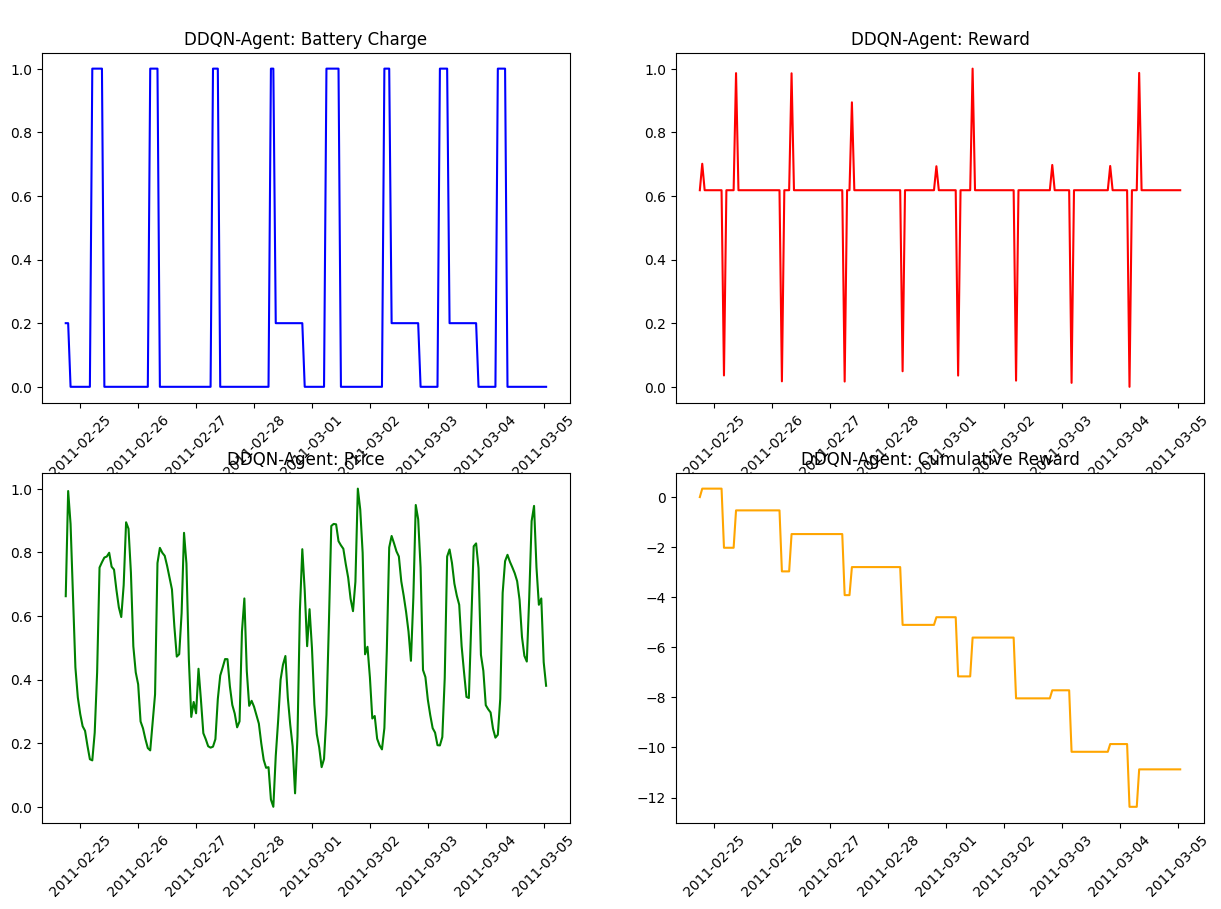

In [6]:
#Visualize DDQN Agent
#plot_range = [14000, 14300]
plot_range = [9000, 9200]
#plot_range = [0, 110000]

plotter = Plotter(eval_ddqn, range = plot_range)
#plotter.plot_actions(battery = False, balance=False, absence = False)
# plotter.plot_actions(battery = False, balance=False, absence = True)
# plotter.plot_actions(battery = False, balance=True, absence = True)
plotter.plot_actions(battery = True, balance=True, absence = True, shaped = True)

plotter.plot_single()

In [7]:
gamma = 0.9386139862524565
reward_shaping_factor = 0.41420794369762703
battery_factor = 0.06555965628369004

In [8]:
factor = reward_shaping_factor

## Evaluation ##
TRAIN = False

if TRAIN:
    df = train_name
    features = features_train
else:
    df = val_name
    features = features_val


# Initialize Environment
env = Electric_Car(path_to_test_data=df)

#Initialize DQN
agent = DDQNAgent(env = env,
                features = features,
                epsilon_decay = epsilon_decay,
                epsilon_start = epsilon,
                epsilon_end = epsilon_min,
                discount_rate = gamma,
                lr = learning_rate,
                buffer_size = 100000,
                price_horizon = price_horizon,
                hidden_dim=hidden_dim,
                num_layers = num_layers,
                positions = positions,
                action_classes = action_classes, 
                reward_shaping = reward_shaping,
                shaping_factor = factor,
                normalize = normalize,
                verbose = False)

agent.dqn_predict.load_state_dict(torch.load(f'models/random_search_gamma{gamma}_factor_{factor}.pt'))

# Evaluate Rule-Based Agent
eval_ddqn = DDQNEvaluation(price_horizon=price_horizon)
eval_ddqn.evaluate(agent = agent)

Absolute Balance:  -372.7408052469136


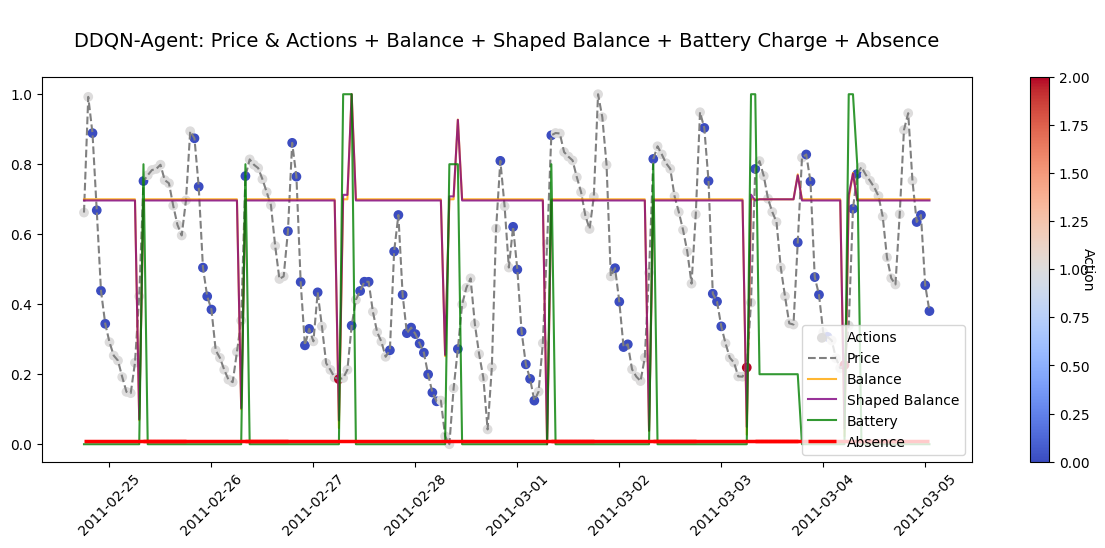

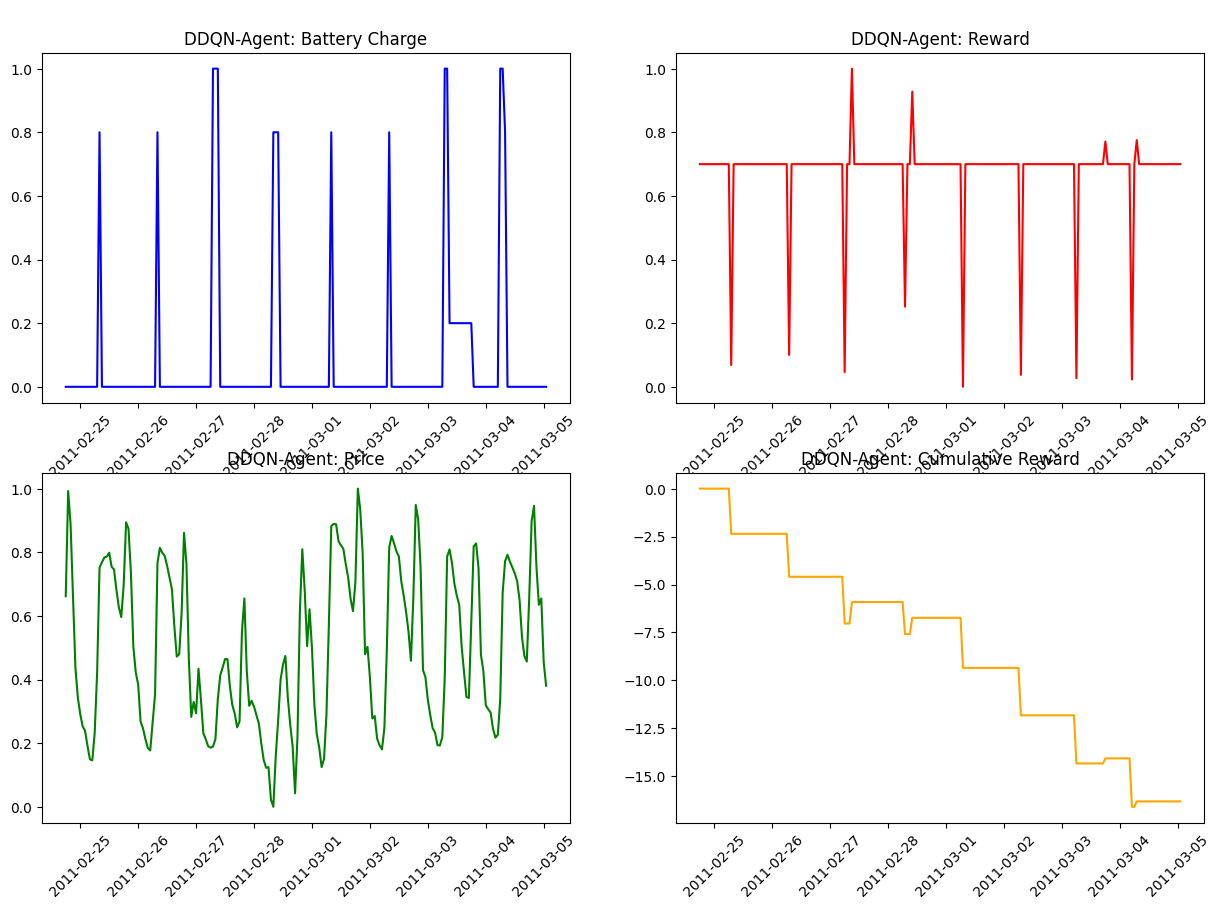

In [9]:
#Visualize DDQN Agent
#plot_range = [14000, 14300]
plot_range = [9000, 9200]
#plot_range = [0, 110000]

plotter = Plotter(eval_ddqn, range = plot_range)
#plotter.plot_actions(battery = False, balance=False, absence = False)
# plotter.plot_actions(battery = False, balance=False, absence = True)
# plotter.plot_actions(battery = False, balance=True, absence = True)
plotter.plot_actions(battery = True, balance=True, absence = True, shaped = True)

plotter.plot_single()

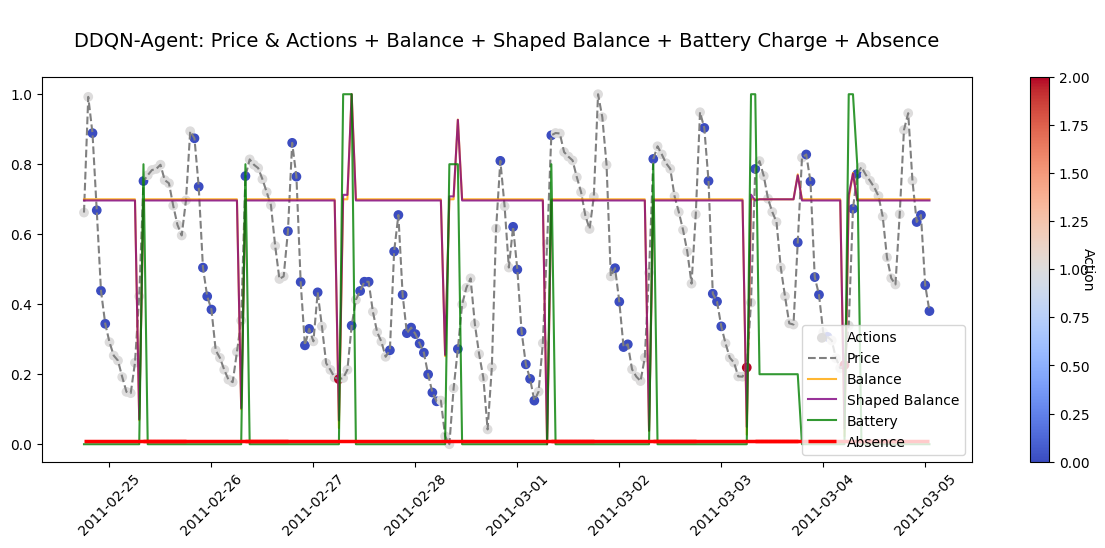

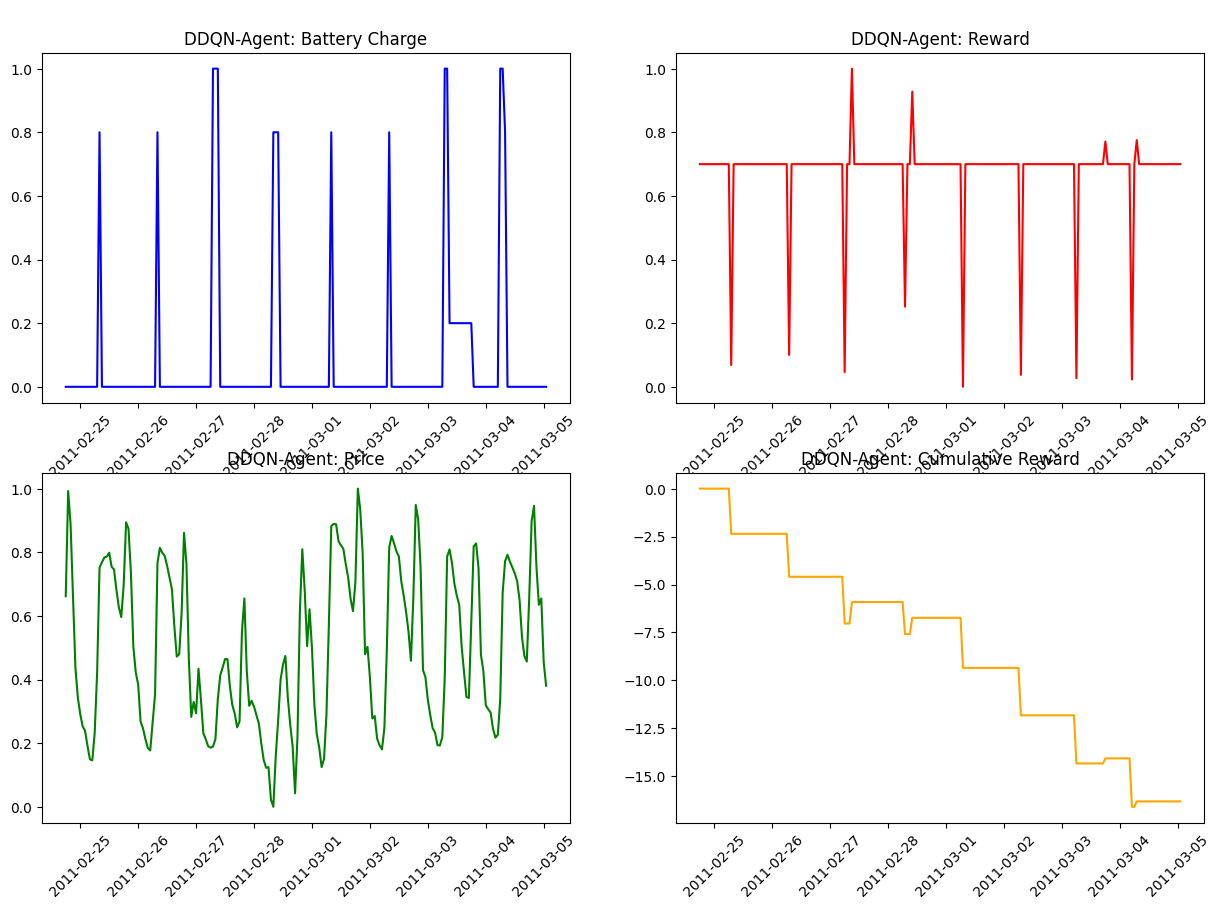

In [10]:
#Visualize DDQN Agent
#plot_range = [14000, 14300]
plot_range = [9000, 9200]
#plot_range = [0, 110000]

plotter = Plotter(eval_ddqn, range = plot_range)
#plotter.plot_actions(battery = False, balance=False, absence = False)
# plotter.plot_actions(battery = False, balance=False, absence = True)
# plotter.plot_actions(battery = False, balance=True, absence = True)
plotter.plot_actions(battery = True, balance=True, absence = True, shaped = True)

plotter.plot_single()

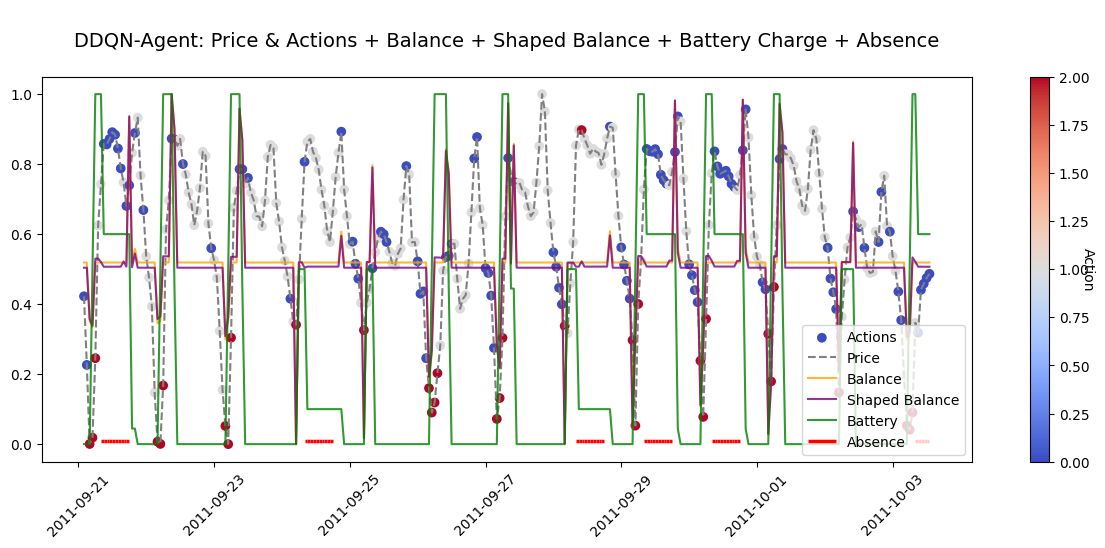

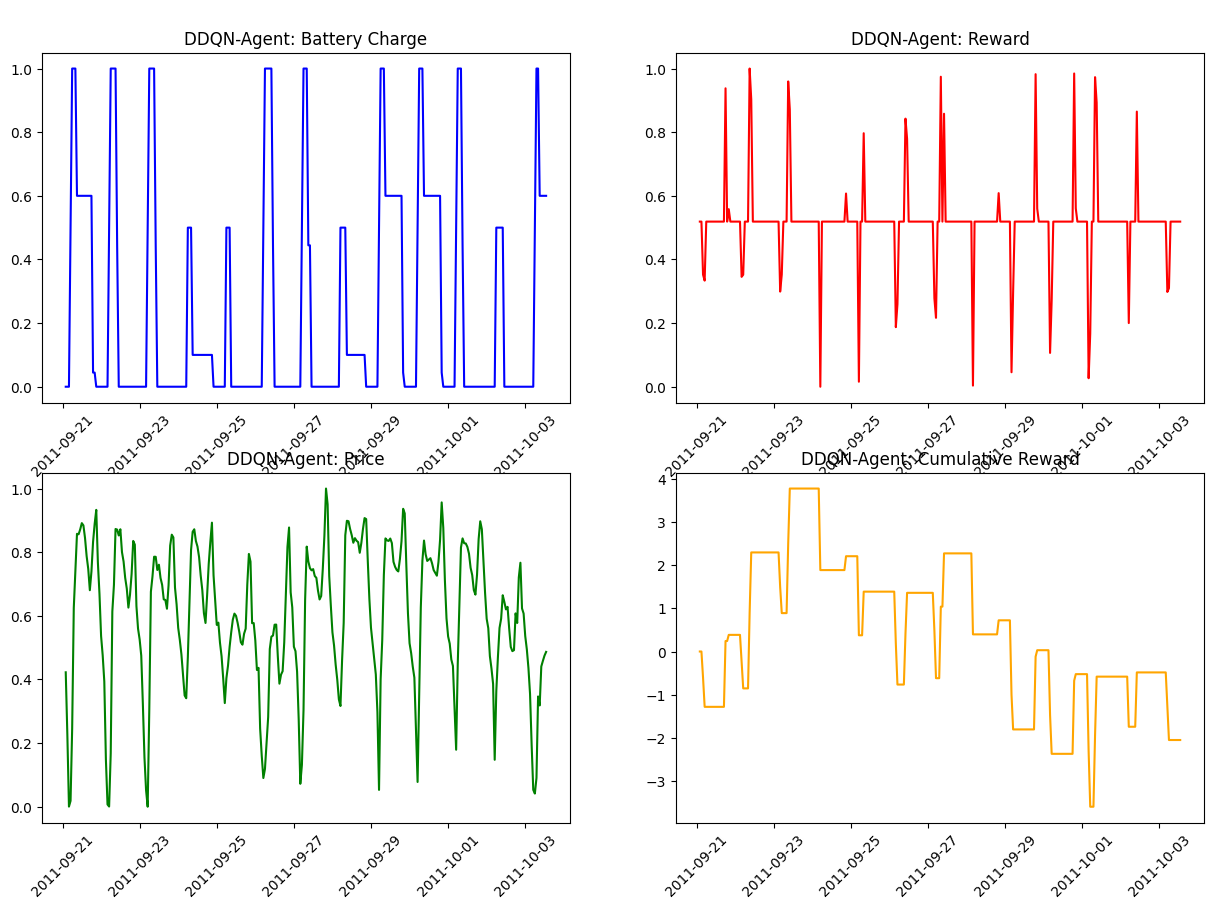

In [11]:
#Visualize DDQN Agent
plot_range = [14000, 14300]
#plot_range = [9000, 9200]
#plot_range = [0, 110000]

plotter = Plotter(eval_ddqn, range = plot_range)
#plotter.plot_actions(battery = False, balance=False, absence = False)
# plotter.plot_actions(battery = False, balance=False, absence = True)
# plotter.plot_actions(battery = False, balance=True, absence = True)
plotter.plot_actions(battery = True, balance=True, absence = True, shaped = True)

plotter.plot_single()

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import pandas as pd
from tqdm import tqdm
import random
from utils import RuleEvaluation, DDQNEvaluation, Plotter
from agent import DDQNAgent, TemporalDDQNAgent
from TestEnv import Electric_Car
seed = 2705
TRAIN = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load Data

def elongate(df):
    df_long = pd.wide_to_long(df, i = "PRICES", j = "hour", stubnames=["Hour"], sep = " ").reset_index()
    df_long.rename(columns={"Hour": "price", "PRICES": "date"}, inplace = True)
    df_long['datetime'] = pd.to_datetime(df_long['date']) + pd.to_timedelta(df_long['hour'], unit='h')
    df_long.sort_values(['datetime'], ascending=[True], inplace=True)
    df_long['price'] = df_long['price'].astype(float) 
    return df_long.reset_index(drop=True)

train_name = 'data/train.xlsx'
val_name = 'data/validate.xlsx'
train = elongate(pd.read_excel(train_name))
val = elongate(pd.read_excel(val_name))
features_train = pd.read_csv('data/features_train.csv')
features_val = pd.read_csv('data/features_val.csv')
gamma = 0.9873110587278168
reward_shaping_factor = 0.25431850336132306
battery_factor = 0.03485932850517898
gamma = 0.9386139862524565
reward_shaping_factor = 0.41420794369762703
battery_factor = 0.06555965628369004

Restarted PRL (Python 3.11.0)

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import pandas as pd
from tqdm import tqdm
import random
from utils import RuleEvaluation, DDQNEvaluation, Plotter
from agent import DDQNAgent, TemporalDDQNAgent
from TestEnv import Electric_Car
seed = 2705
TRAIN = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load Data

def elongate(df):
    df_long = pd.wide_to_long(df, i = "PRICES", j = "hour", stubnames=["Hour"], sep = " ").reset_index()
    df_long.rename(columns={"Hour": "price", "PRICES": "date"}, inplace = True)
    df_long['datetime'] = pd.to_datetime(df_long['date']) + pd.to_timedelta(df_long['hour'], unit='h')
    df_long.sort_values(['datetime'], ascending=[True], inplace=True)
    df_long['price'] = df_long['price'].astype(float) 
    return df_long.reset_index(drop=True)

train_name = 'data/train.xlsx'
val_name = 'data/validate.xlsx'
train = elongate(pd.read_excel(train_name))
val = elongate(pd.read_excel(val_name))
features_train = pd.read_csv('data/features_train.csv')
features_val = pd.read_csv('data/features_val.csv')
gamma = 0.9873110587278168
reward_shaping_factor = 0.25431850336132306
battery_factor = 0.03485932850517898
gamma = 0.9386139862524565
reward_shaping_factor = 0.41420794369762703
battery_factor = 0.06555965628369004
#%%
# Define the intervals for gamma and reward shaping factor

gamma_interval = [0.93, 0.99]
reward_shaping_interval = [0.5, 0.9]
#battery_factor_interval = [0.0, 0.15]
# Define the number of iterations for the random search

num_iterations = 100
for i in range(num_iterations):
    # Generate random values within the intervals
    gamma = round(np.random.uniform(*gamma_interval), 4)
    reward_shaping_factor = round(np.random.uniform(*reward_shaping_interval), 4)
    battery_factor = None #round(np.random.uniform(*battery_factor_interval), 4)
    print(f'\nIteration: {i+1}, Gamma: {gamma}, Reward Shaping Factor: {reward_shaping_factor}')
    seed = 2705
    rep = 105000 * 3
    batch_size = 48
    gamma = gamma
    epsilon = 1.0
    epsilon_decay = 99999
    epsilon_min = 0.1
    learning_rate = 5e-5
    price_horizon = 48
    future_horizon = 0
    hidden_dim = 128
    num_layers = 4
    positions = False
    action_classes = 3
    reward_shaping = True
    factor = reward_shaping_factor
    verbose = False
    normalize = True
    df = train_name
    # Initialize Environment
    env = Electric_Car(path_to_test_data=df)
    val_env = Electric_Car(path_to_test_data=val_name)
    #Initialize DQN
    agent = DDQNAgent(env = env,
                    features = features_train,
                    epsilon_decay = epsilon_decay,
                    epsilon_start = epsilon,
                    epsilon_end = epsilon_min,
                    discount_rate = gamma,
                    lr = learning_rate,
                    buffer_size = 100000,
                    price_horizon = price_horizon,
                    hidden_dim=hidden_dim,
                    num_layers = num_layers,
                    positions = positions,
                    action_classes = action_classes, 
                    reward_shaping = reward_shaping,
                    shaping_factor = factor,
                    normalize = normalize,
                    verbose = verbose)
    val_agent = DDQNAgent(env = val_env,
                    features = features_val,
                    epsilon_decay = epsilon_decay,
                    epsilon_start = epsilon,
                    epsilon_end = epsilon_min,
                    discount_rate = gamma,
                    lr = learning_rate,
                    buffer_size = 100000,
                    price_horizon = price_horizon,
                    hidden_dim=hidden_dim,
                    num_layers = num_layers,
                    positions = positions,
                    action_classes = action_classes, 
                    reward_shaping = reward_shaping,
                    shaping_factor = factor,
                    normalize = normalize,
                    verbose = verbose)
    episode_balance = 0
    episode_loss = 0
    episode_counter = 0
    episode_reward = 0
    obs, r, t, _, _ = env.step(random.randint(-1,1)) # Reset environment and get initial observation
    state, grads = agent.obs_to_state(obs)
    for i in tqdm(range(rep)):
        action = agent.choose_action(i, state, greedy = False) # Choose action (discrete)
        cont_action = agent.action_to_cont(action) # Convert to continuous action
        new_obs, r, t, _, _ = env.step(cont_action)
        new_state, new_grads = agent.obs_to_state(new_obs)
        # Reward Shaping            
        new_reward = agent.shape_reward(r, cont_action, grads, battery_factor = battery_factor)
        # Fill replay buffer - THIS IS THE ONLY THING WE DO WITH THE CURRENT OBSERVATION - LEARNING IS FULLY PERFORMED FROM THE REPLAY BUFFER
        if state.shape[0] == agent.state_dim and new_state.shape[0] == agent.state_dim:
            agent.replay_memory.add_data((state, action, new_reward, t, new_state))
        #Update DQN
        loss = agent.optimize(batch_size)
        # Update values
        episode_balance += r
        episode_reward += r
        episode_loss += loss
        # New observation
        state = new_state
        grads = new_grads # Gradients for reward shaping
        if t:
            # Reset Environment
            env.counter = 0
            env.hour = 1
            env.day = 1
            episode_counter += 1
            if episode_counter % 4 == 0:
                print('Episode ', episode_counter, 'Balance: ', episode_balance, 'Reward: ', episode_reward, 'Loss: ', episode_loss) # Add both balance and reward to see how training objective and actually spent money differ
            # Scheduler Step
            agent.scheduler.step(episode_loss)
            episode_loss = 0
            episode_balance = 0
            episode_reward = 0
            if episode_counter % 4 == 0:
                # Evaluate DQN
                print("Training Evaluation")
                train_dqn = DDQNEvaluation(price_horizon = price_horizon)
                train_dqn.evaluate(agent = agent)
                # Evaluate DQN
                print("Validation Evaluation")
                val_agent.dqn_predict.load_state_dict(agent.dqn_predict.state_dict())
                val_dqn = DDQNEvaluation(price_horizon = price_horizon)
                val_dqn.evaluate(agent = val_agent)
                # Reset Environment
                env.counter = 0
                env.hour = 1
                env.day = 1
                val_env.counter = 0
                val_env.hour = 1
                val_env.day = 1
    # Save agent
    torch.save(agent.dqn_predict.state_dict(), f'models/chargesearch_gamma_{gamma}_factor_{reward_shaping_factor}.pt')


Iteration: 1, Gamma: 0.9409, Reward Shaping Factor: 0.5333


 33%|███▎      | 104160/315000 [07:10<15:55, 220.60it/s]

Episode  4 Balance:  -1917.9014724691394 Reward:  -1917.9014724691394 Loss:  856.7496718838811
Training Evaluation
Absolute Balance:  -167.38218172839515
Validation Evaluation


 33%|███▎      | 104214/315000 [07:26<7:41:21,  7.61it/s] 

Absolute Balance:  -494.95895111111116


 66%|██████▋   | 209346/315000 [13:42<05:59, 293.52it/s] 

Episode  8 Balance:  -906.8127178395067 Reward:  -906.8127178395067 Loss:  892.074815462809
Training Evaluation
Absolute Balance:  68.99353037037034
Validation Evaluation


 66%|██████▋   | 209399/315000 [13:59<3:45:52,  7.79it/s]

Absolute Balance:  -407.45036783950627


 92%|█████████▏| 288343/315000 [18:28<01:19, 336.13it/s] 

Epoch 00011: reducing learning rate of group 0 to 2.5000e-05.


100%|█████████▉| 314584/315000 [19:48<00:01, 338.98it/s]

Episode  12 Balance:  -805.4421642592573 Reward:  -805.4421642592573 Loss:  1194.7423229729757
Training Evaluation
Absolute Balance:  42.96176623456786
Validation Evaluation


100%|█████████▉| 314617/315000 [20:03<00:45,  8.33it/s] 

Absolute Balance:  -407.83296055555553


100%|██████████| 315000/315000 [20:04<00:00, 261.44it/s]



Iteration: 2, Gamma: 0.9729, Reward Shaping Factor: 0.5265


 33%|███▎      | 104144/315000 [05:39<13:06, 268.21it/s]

Episode  4 Balance:  -2029.3175940123492 Reward:  -2029.3175940123492 Loss:  1084.017386816442
Training Evaluation
Absolute Balance:  -194.66714901234576
Validation Evaluation


 33%|███▎      | 104187/315000 [05:56<8:23:31,  6.98it/s] 

Absolute Balance:  -397.6192677160495


 66%|██████▋   | 209373/315000 [11:18<05:24, 325.91it/s] 

Episode  8 Balance:  -785.4835812345657 Reward:  -785.4835812345657 Loss:  1479.9827821720392
Training Evaluation
Absolute Balance:  -45.72890166666675
Validation Evaluation


 66%|██████▋   | 209405/315000 [11:35<4:01:43,  7.28it/s]

Absolute Balance:  -424.5989470370371


 92%|█████████▏| 288329/315000 [15:40<01:19, 334.30it/s] 

Epoch 00011: reducing learning rate of group 0 to 2.5000e-05.


100%|█████████▉| 314572/315000 [17:07<00:01, 340.16it/s]

Episode  12 Balance:  -708.6704495061731 Reward:  -708.6704495061731 Loss:  2581.203465156257
Training Evaluation
Absolute Balance:  -91.92323351851861
Validation Evaluation


100%|█████████▉| 314612/315000 [17:22<00:46,  8.37it/s] 

Absolute Balance:  -412.0617206790124


100%|██████████| 315000/315000 [17:23<00:00, 301.92it/s]



Iteration: 3, Gamma: 0.9371, Reward Shaping Factor: 0.5026


 33%|███▎      | 104159/315000 [05:41<12:21, 284.41it/s]

Episode  4 Balance:  -2102.6834092592603 Reward:  -2102.6834092592603 Loss:  989.5681260470301
Training Evaluation
Absolute Balance:  -164.49505543209875
Validation Evaluation


 33%|███▎      | 104216/315000 [05:58<7:27:28,  7.85it/s] 

Absolute Balance:  -532.8083644444445


 66%|██████▋   | 209360/315000 [11:27<05:12, 338.46it/s] 

Episode  8 Balance:  -976.147553888887 Reward:  -976.147553888887 Loss:  920.6003884174861
Training Evaluation
Absolute Balance:  -30.287568888888945
Validation Evaluation


 66%|██████▋   | 209406/315000 [11:42<3:09:56,  9.27it/s]

Absolute Balance:  -473.9056923456791


 92%|█████████▏| 288327/315000 [15:47<01:26, 309.49it/s] 

Epoch 00011: reducing learning rate of group 0 to 2.5000e-05.


100%|█████████▉| 314560/315000 [17:12<00:01, 320.28it/s]

Episode  12 Balance:  -752.3186161728405 Reward:  -752.3186161728405 Loss:  1568.5709220748395
Training Evaluation
Absolute Balance:  9.918698641975258
Validation Evaluation


100%|█████████▉| 314622/315000 [17:27<00:37, 10.20it/s] 

Absolute Balance:  -459.98455302469137


100%|██████████| 315000/315000 [17:28<00:00, 300.39it/s]



Iteration: 4, Gamma: 0.9572, Reward Shaping Factor: 0.5769


 33%|███▎      | 104138/315000 [06:41<14:19, 245.34it/s]

Episode  4 Balance:  -1935.8497746296305 Reward:  -1935.8497746296305 Loss:  1092.0426144478843
Training Evaluation
Absolute Balance:  -149.15224783950623
Validation Evaluation


 33%|███▎      | 104184/315000 [06:57<8:22:06,  7.00it/s] 

Absolute Balance:  -528.0371137037038


 66%|██████▋   | 209368/315000 [12:38<05:15, 334.39it/s] 

Episode  8 Balance:  -732.6897833333338 Reward:  -732.6897833333338 Loss:  1263.859248557128
Training Evaluation
Absolute Balance:  -4.941095802469211
Validation Evaluation


 66%|██████▋   | 209406/315000 [12:54<3:43:52,  7.86it/s]

Absolute Balance:  -336.9932112345679


 92%|█████████▏| 288344/315000 [17:00<01:25, 310.26it/s] 

Epoch 00011: reducing learning rate of group 0 to 2.5000e-05.


100%|█████████▉| 314555/315000 [18:21<00:01, 333.69it/s]

Episode  12 Balance:  -829.9165005555541 Reward:  -829.9165005555541 Loss:  1695.1722282161936
Training Evaluation
Absolute Balance:  -20.870821111111173
Validation Evaluation


100%|█████████▉| 314623/315000 [18:36<00:34, 10.98it/s] 

Absolute Balance:  -349.18876851851854


100%|██████████| 315000/315000 [18:37<00:00, 281.92it/s]



Iteration: 5, Gamma: 0.9858, Reward Shaping Factor: 0.7594


 33%|███▎      | 104136/315000 [05:44<12:02, 291.89it/s]

Episode  4 Balance:  -1678.5516693209934 Reward:  -1678.5516693209934 Loss:  1657.549680666998
Training Evaluation
Absolute Balance:  -462.793329197531
Validation Evaluation


 33%|███▎      | 104178/315000 [05:58<7:16:20,  8.05it/s]

Absolute Balance:  -333.0035524074074


 66%|██████▋   | 209355/315000 [11:24<06:10, 284.77it/s] 

Episode  8 Balance:  -1072.6097449382705 Reward:  -1072.6097449382705 Loss:  3326.807042479515
Training Evaluation
Absolute Balance:  -453.4817117283952
Validation Evaluation


 66%|██████▋   | 209408/315000 [11:41<3:54:34,  7.50it/s]

Absolute Balance:  -448.1247934567902


 92%|█████████▏| 288332/315000 [15:50<01:19, 336.76it/s] 

Epoch 00011: reducing learning rate of group 0 to 2.5000e-05.


100%|█████████▉| 314577/315000 [17:10<00:01, 319.30it/s]

Episode  12 Balance:  -946.0213546913595 Reward:  -946.0213546913595 Loss:  5758.205254741013
Training Evaluation
Absolute Balance:  -431.3925487037038
Validation Evaluation


100%|█████████▉| 314617/315000 [17:25<00:44,  8.62it/s] 

Absolute Balance:  -390.5534707407408


100%|██████████| 315000/315000 [17:26<00:00, 300.95it/s]



Iteration: 6, Gamma: 0.9629, Reward Shaping Factor: 0.6985


 33%|███▎      | 104142/315000 [05:51<12:08, 289.35it/s]

Episode  4 Balance:  -1738.4551824074103 Reward:  -1738.4551824074103 Loss:  1269.7042525159195
Training Evaluation
Absolute Balance:  -179.27379351851863
Validation Evaluation


 33%|███▎      | 104191/315000 [06:06<6:38:07,  8.82it/s]

Absolute Balance:  -389.39558660493833


 66%|██████▋   | 209352/315000 [11:33<05:11, 338.70it/s] 

Episode  8 Balance:  -730.3784154320978 Reward:  -730.3784154320978 Loss:  1808.990816829726
Training Evaluation
Absolute Balance:  -134.2947258641976
Validation Evaluation


 66%|██████▋   | 209406/315000 [11:47<2:56:57,  9.94it/s]

Absolute Balance:  -413.9284186419753


 92%|█████████▏| 288336/315000 [15:51<01:24, 314.60it/s] 

Epoch 00011: reducing learning rate of group 0 to 2.5000e-05.


100%|█████████▉| 314560/315000 [17:13<00:01, 329.10it/s]

Episode  12 Balance:  -776.2972356790115 Reward:  -776.2972356790115 Loss:  2470.73824464716
Training Evaluation
Absolute Balance:  -140.96741469135813
Validation Evaluation


100%|█████████▉| 314618/315000 [17:28<00:38,  9.83it/s] 

Absolute Balance:  -328.33085820987657


100%|██████████| 315000/315000 [17:30<00:00, 299.93it/s]



Iteration: 7, Gamma: 0.9618, Reward Shaping Factor: 0.8914


 33%|███▎      | 104135/315000 [05:40<17:57, 195.74it/s]

Episode  4 Balance:  -1523.666260061732 Reward:  -1523.666260061732 Loss:  1317.9815498460084
Training Evaluation
Absolute Balance:  -256.0486047530865
Validation Evaluation


 33%|███▎      | 104190/315000 [05:59<8:40:36,  6.75it/s] 

Absolute Balance:  -412.34539660493834


 66%|██████▋   | 209361/315000 [12:59<06:22, 275.95it/s] 

Episode  8 Balance:  -957.7372235185176 Reward:  -957.7372235185176 Loss:  2035.297033464536
Training Evaluation
Absolute Balance:  -232.24274938271614
Validation Evaluation


 66%|██████▋   | 209384/315000 [13:17<5:36:43,  5.23it/s]

Absolute Balance:  -355.46442314814817


 75%|███████▌  | 236889/315000 [15:14<05:01, 259.00it/s] 


KeyboardInterrupt: 